In [250]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

In [251]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [252]:
df = pd.read_csv('../../dataset/cleaned_arguments_in_context_learning.csv')



vector = TfidfVectorizer()

X = vector.fit_transform(df["arguments"])
y = df["actor_label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

y = np.array([label2id[label] for label in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
[5 6 5 ... 4 3 5]


In [253]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy(y_test, y_pred))


0.3117428486397535


In [254]:
# Try with a binary classifier
vector = TfidfVectorizer()

X = vector.fit_transform(df["arguments"])
y = df["actor_label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

print(label2id)

y = np.array([label2id[label] for label in y])

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
{'Akademisk institusjon': 0, 'Bedrift': 1, 'Frivillig organisasjon': 2, 'Interessegruppe': 3, 'Offentlig forvaltning': 4, 'Politisk parti': 5, 'Privatperson': 6}


In [255]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.9138357375442037


<Axes: >

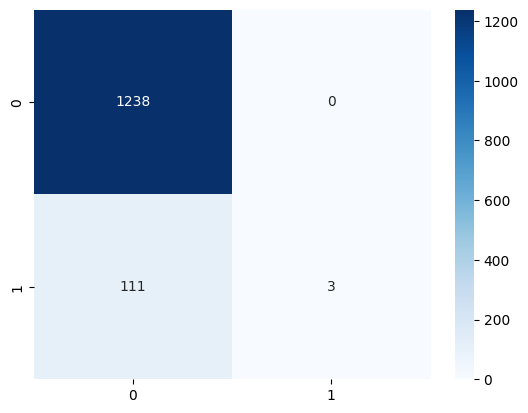

In [256]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')


In [257]:
# Try with a binary classifier
vector = CountVectorizer()

X = vector.fit_transform(df["arguments"])
y = df["actor_label"].to_numpy()
print(y)

# Convert labels to numbers
id2label = {i: label for i, label in enumerate(np.unique(y))}
label2id = {label: i for i, label in id2label.items()}

print(label2id)

y = np.array([label2id[label] for label in y])

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

['Interessegruppe' 'Interessegruppe' 'Interessegruppe' ...
 'Frivillig organisasjon' 'Frivillig organisasjon'
 'Frivillig organisasjon']
{'Akademisk institusjon': 0, 'Bedrift': 1, 'Frivillig organisasjon': 2, 'Interessegruppe': 3, 'Offentlig forvaltning': 4, 'Politisk parti': 5, 'Privatperson': 6}


In [258]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.8750962851440776


<Axes: >

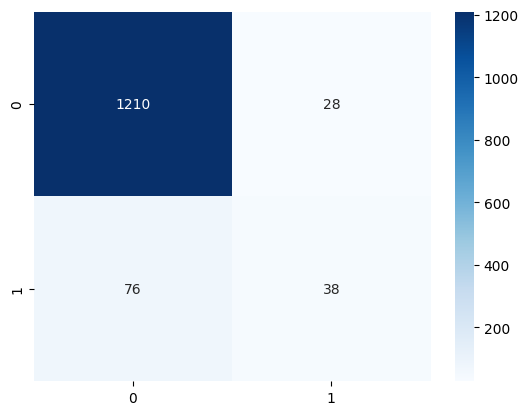

In [259]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

## SVM